In [1]:
import pandas as pd
import numpy as np
import types
import matplotlib.pyplot as plt


In [10]:
%matplotlib inline

In [48]:
for i in dir(pd) :
    if type(pd.__dict__.get(i)) == types.FunctionType :
        print(i)

Expr
Term
bdate_range
concat
crosstab
cut
date_range
eval
ewma
ewmcorr
ewmcov
ewmstd
ewmvar
ewmvol
expanding_apply
expanding_corr
expanding_count
expanding_cov
expanding_kurt
expanding_max
expanding_mean
expanding_median
expanding_min
expanding_quantile
expanding_skew
expanding_std
expanding_sum
expanding_var
factorize
get_dummies
get_store
groupby
infer_freq
interval_range
isnull
lreshape
match
melt
merge
merge_asof
merge_ordered
notnull
ordered_merge
period_range
pivot
pivot_table
pnow
qcut
read_clipboard
read_csv
read_excel
read_feather
read_fwf
read_gbq
read_hdf
read_html
read_json
read_msgpack
read_pickle
read_sas
read_sql
read_sql_query
read_sql_table
read_stata
read_table
rolling_apply
rolling_corr
rolling_count
rolling_cov
rolling_kurt
rolling_max
rolling_mean
rolling_median
rolling_min
rolling_quantile
rolling_skew
rolling_std
rolling_sum
rolling_var
rolling_window
scatter_matrix
set_eng_float_format
show_versions
test
timedelta_range
to_datetime
to_msgpack
to_numeric
to_pickl

## concat 통합하기

    두 개의 시리즈를 연결할 때는 concat를 사용해서 처리한다. 
    이 함수에 연결할 때는 반복형이어야 하므로 반드시 리스트로 처리해야한다.
    index는  그대로 연결된다.

In [3]:
a = pd.Series([1,2,3,4])
b = pd.Series([5,6,7,8])

c = pd.concat([a,b])

print(c)

0    1
1    2
2    3
3    4
0    5
1    6
2    7
3    8
dtype: int64


In [5]:
pd.concat([a,b],axis=0)

0    1
1    2
2    3
3    4
0    5
1    6
2    7
3    8
dtype: int64

## 실제 축을 열로 하면 데이터 프레임이 된다.


In [7]:
d = pd.concat([a,b],axis=1)

print(d)
print(type(d))

   0  1
0  1  5
1  2  6
2  3  7
3  4  8
<class 'pandas.core.frame.DataFrame'>


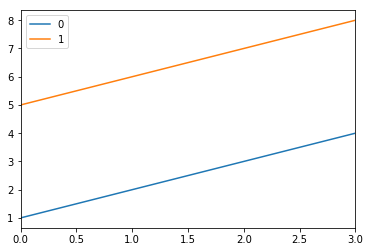

In [11]:
d.plot()

## merge는 실제 데이터 프레임일 경우에만 적용이 가능



In [12]:
pd.merge(a,b)

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.series.Series'>

##  완전한 다른 사본의 시리즈로 만들기 위해 copy 하기

        실제 base 속성에 원본이 있으면 기존 원본을 위한 뷰이고 새로운 사본을 만들면 base에는 None이 있다.


In [13]:
f = a.copy() 

print(f.base)

None


In [14]:
f

0    1
1    2
2    3
3    4
dtype: int64

In [19]:
g = f.astype(np.int64)

## 기존 시리즈에 붙이기 append 메소드 사용

    append 메소드는 인자로는 반드시 시리즈 인스턴스여야 한다. 
    

In [28]:
l = g.append(f)

In [29]:
l

0    1
1    2
2    3
3    4
0    1
1    2
2    3
3    4
dtype: int64

In [31]:
type(l)

pandas.core.series.Series

### 인덱스를 순서별로 처리하기

In [34]:
g.append(f, ignore_index=True)

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

## 원소를 삭제하기 

    pop 메소드는 반드시 인덱스가 문자일 경우만 처리된다.

In [43]:
g.pop()

TypeError: pop() missing 1 required positional argument: 'item'

In [42]:
ser1 = pd.Series([991,992,993,994],index=['a','b','c','f'])

print(ser1.pop('a'))
print(ser1)

991
b    992
c    993
f    994
dtype: int64
